### Import Libraries

In [14]:
import os, torch, random
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms,datasets
from torch.utils import data

### Config file

In [15]:
config = {"epochs": 2, "dataset":"MNIST", "net": "LeNet", "resize_size":32, "batch_size":4,"niid": 5}

### Collecting data

In [16]:
def get_data(config):
    # If the dataset is not custom, create a dataset folder
    if config['dataset'] != 'CUSTOM':
        dataset_path = "client_dataset"
        if not os.path.exists(dataset_path):
            os.makedirs(dataset_path)

    # Get the train and test datasets for each supported dataset
    if config['dataset'] == 'MNIST':
        # Apply transformations to the images
        apply_transform = transforms.Compose([transforms.Resize(config["resize_size"]), transforms.ToTensor()])
        # Download and load the trainset
        trainset = datasets.MNIST(root='client_dataset/MNIST', train=True, download=True, transform=apply_transform)
        # Download and load the testset
        testset = datasets.MNIST(root='client_dataset/MNIST', train=False, download=True, transform=apply_transform)
    elif config['dataset'] == 'FashionMNIST':
        apply_transform = transforms.Compose([transforms.Resize(config['resize_size']), transforms.ToTensor()])
        trainset = datasets.FashionMNIST(root='client_dataset/FashionMNIST',
                                        train=True, download=True, transform=apply_transform)
        testset = datasets.FashionMNIST(root='client_dataset/FashionMNIST',
                                        train=False, download=True, transform=apply_transform)
    elif config['dataset'] == 'CIFAR10':
        apply_transform = transforms.Compose([transforms.Resize(config['resize_size']), transforms.ToTensor()])
        trainset = datasets.CIFAR10(root='client_dataset/CIFAR10',
                                    train=True, download=True, transform=apply_transform)
        testset = datasets.CIFAR10(root='client_dataset/CIFAR10',
                                   train=False, download=True, transform=apply_transform)
    elif config['dataset'] == 'CIFAR100':
        apply_transform = transforms.Compose([transforms.Resize(config['resize_size']), transforms.ToTensor()])
        trainset = datasets.CIFAR100(root='client_dataset/CIFAR100',
                                     train=True, download=True, transform=apply_transform)
        testset = datasets.CIFAR100(root='client_dataset/CIFAR100',
                                    train=False, download=True, transform=apply_transform)
    else:
        # Raise an error if an unsupported dataset is specified
        raise ValueError(f"Unsupported dataset type: {config['dataset']}")
    # Return the train and test datasets
    return trainset, testset



In [17]:
trainset, testset = get_data(config)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting client_dataset/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to client_dataset/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting client_dataset/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to client_dataset/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting client_dataset/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to client_dataset/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting client_dataset/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to client_dataset/MNIST/MNIST/raw



### Intilization

In [18]:
labels = []
base_dir = os.getcwd()
storepath = os.path.join(base_dir, 'Distribution/', config['dataset']+'/')
seed = 10
random.seed(seed)
num_users = 5

### Number of samples present per class

In [19]:
#Calculate the number of samples present per class
trainset_list = list(range(len(trainset)))
for i in trainset_list:
    labels.append(trainset[i][1])
unique_labels = np.unique(np.array(labels))
label_index_list = {}
for key in unique_labels:
    label_index_list[key] = []
for index, label in enumerate(labels):
    label_index_list[label].append(index)
num_classes = len(unique_labels)

In [20]:
print("Number of images of '0': ",len(label_index_list[0]))
print("Number of images of '1': ",len(label_index_list[1]))
print("Number of images of '2': ",len(label_index_list[2]))
print("Number of images of '3': ",len(label_index_list[3]))
print("Number of images of '4': ",len(label_index_list[4]))
print("Number of images of '5': ",len(label_index_list[5]))
print("Number of images of '6': ",len(label_index_list[6]))
print("Number of images of '7': ",len(label_index_list[7]))
print("Number of images of '8': ",len(label_index_list[8]))
print("Number of images of '9': ",len(label_index_list[9]))

Number of images of '0':  5923
Number of images of '1':  6742
Number of images of '2':  5958
Number of images of '3':  6131
Number of images of '4':  5842
Number of images of '5':  5421
Number of images of '6':  5918
Number of images of '7':  6265
Number of images of '8':  5851
Number of images of '9':  5949


### Probability Distribution

In [21]:
#Calculate the value of the probability distribution. For K=1, it will be iid distribution
K = config['niid']
if K==1:
    q_step = (1 - (1/num_classes))
else:
    q_step = (1 - (1/num_classes))/(K-1)



### Index shuffle for all classes

In [22]:
#Shuffle the index position for all classes
label_index_list_list = list(range(len(label_index_list)))
for i in label_index_list_list:
    random.shuffle(label_index_list[i])

### Example

In [23]:
j=0
dist = np.random.uniform(q_step, (1+j)*q_step, (num_classes, num_users))
print(dist)
print(dist.shape)

[[0.225 0.225 0.225 0.225 0.225]
 [0.225 0.225 0.225 0.225 0.225]
 [0.225 0.225 0.225 0.225 0.225]
 [0.225 0.225 0.225 0.225 0.225]
 [0.225 0.225 0.225 0.225 0.225]
 [0.225 0.225 0.225 0.225 0.225]
 [0.225 0.225 0.225 0.225 0.225]
 [0.225 0.225 0.225 0.225 0.225]
 [0.225 0.225 0.225 0.225 0.225]
 [0.225 0.225 0.225 0.225 0.225]]
(10, 5)


In [24]:
psum = np.sum(dist, axis=1)
print(psum)

[1.125 1.125 1.125 1.125 1.125 1.125 1.125 1.125 1.125 1.125]


In [25]:
psum = np.sum(dist, axis=1)
for i in range(dist.shape[0]):
    dist[i] = dist[i]*len(label_index_list[i])/(psum[i]+0.00001)
dist = np.floor(dist).astype(int)
print(dist)

[[1184 1184 1184 1184 1184]
 [1348 1348 1348 1348 1348]
 [1191 1191 1191 1191 1191]
 [1226 1226 1226 1226 1226]
 [1168 1168 1168 1168 1168]
 [1084 1084 1084 1084 1084]
 [1183 1183 1183 1183 1183]
 [1252 1252 1252 1252 1252]
 [1170 1170 1170 1170 1170]
 [1189 1189 1189 1189 1189]]


### Plotting Functions

In [26]:
def plot_sample_stats(dist, num_users,filename=None):
    classes = [f'class {i+1}' for i in range(len(dist))]
    plt.figure(figsize=(5, 6))
    for i in range(len(classes)):
        left = sum(dist[j][:num_users] for j in range(i))
        plt.barh(range(num_users), dist[i][:num_users], left=left, label=classes[i])
    plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    plt.yticks(range(num_users), [f'Client {i+1}' for i in range(num_users)])
    plt.title("Distribution")
    plt.xlabel('Number of samples')
    plt.ylabel('Client')
    if filename:
        plt.savefig(filename, bbox_inches='tight')
def plot_class_stats(class_stats, num_users,filename=None):
    classes = [f'class {i+1}' for i in range(len(class_stats))]
    plt.figure(figsize=(5, 6))
    for i in range(len(classes)):
        left = sum(class_stats[j][:num_users] for j in range(i))
        plt.barh(range(num_users), class_stats[i][:num_users], left=left, label=classes[i])
    plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
    plt.yticks(range(num_users), [f'Client {i+1}' for i in range(num_users)])
    plt.title("Distribution")
    plt.xlabel('Number of classes')
    plt.ylabel('Clients')
    if filename:
        plt.savefig(filename, bbox_inches='tight')

### Non-IID Distributions

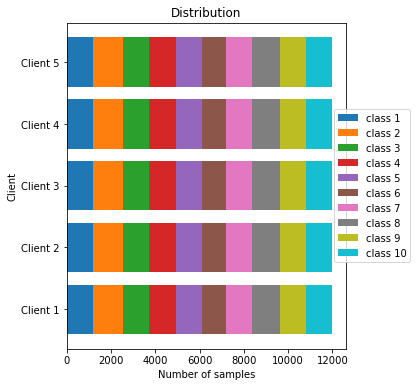

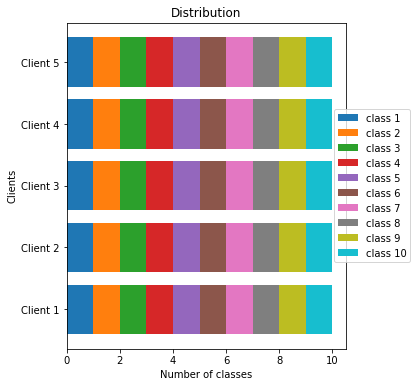

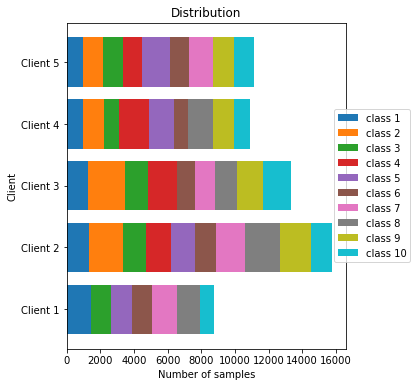

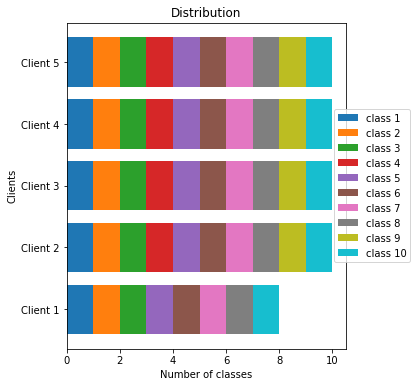

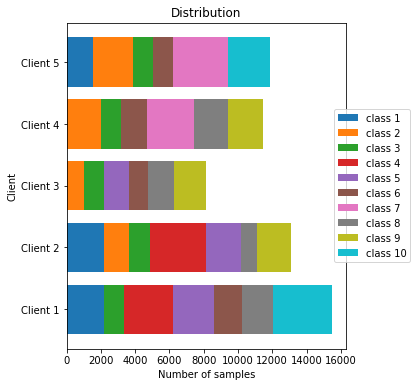

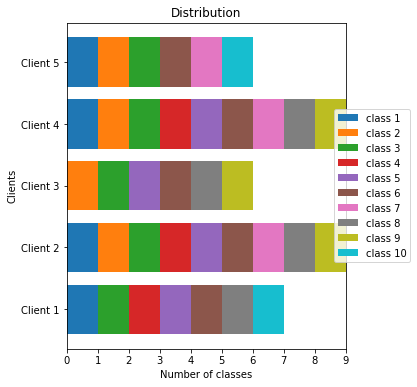

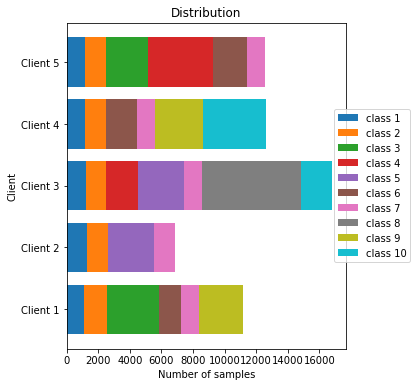

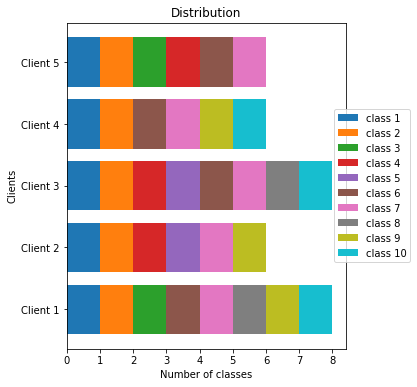

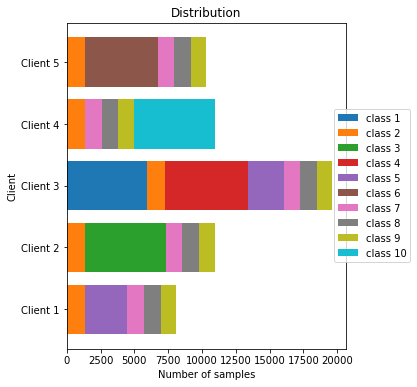

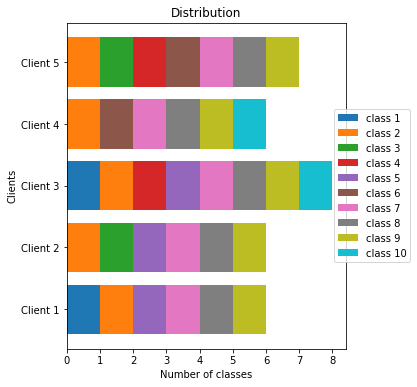

In [27]:

#Generate the different non-iid distribution.
# Data_presence_indicator will help to reduce the number of classes --
# among the clients as the non-iid increases
for j in range(K):
    dist = np.random.uniform(q_step, (1+j)*q_step, (num_classes, num_users))
    if j != 0:
        data_presence_indicator = np.random.choice([0, 1], (num_classes, num_users), p=[j*q_step, 1-(j*q_step)])
        if len(np.where(np.sum(data_presence_indicator, axis=0) == 0)[0])>0:
            for i in np.where(np.sum(data_presence_indicator, axis=0) == 0)[0]:
                zero_array = data_presence_indicator[:,i]
                zero_array[np.random.choice(len(zero_array),1)] =1
                data_presence_indicator[:,i] = zero_array
        dist = np.multiply(dist,data_presence_indicator)
    psum = np.sum(dist, axis=1)
    for i in range(dist.shape[0]):
        dist[i] = dist[i]*len(label_index_list[i])/(psum[i]+0.00001)
    dist = np.floor(dist).astype(int)

    # If any client does not get any data then this logic helps to allocate the required samples among the clients
    gainers = list(np.where(np.sum(dist, axis=0) != 0))[0]
    if len(gainers) < num_users:
        losers = list(np.where(np.sum(dist, axis=0) == 0))[0]
        donors = np.random.choice(gainers, len(losers))
        for index, donor in enumerate(donors):
            avail_digits = np.where(dist[:,donor] != 0)[0]
            for digit in avail_digits:
                transfer_frac = np.random.uniform(0.1,0.9)
                num_transfer = int(dist[digit, donor]*transfer_frac)
                dist[digit, donor] = dist[digit, donor] - num_transfer
                dist[digit, losers[index]] = num_transfer

    #Logic to check if the summation of all the samples among the clients is equal to
    # # the total number of samples present for that class. If not it will adjust.
    for num in range(num_classes):
        while dist[num].sum() != len(label_index_list[num]):
            index = random.randint(0,num_users-1)
            if dist[num].sum() < len(label_index_list[num]):
                dist[num][index]+=1
            else:
                dist[num][index]-=1
        

    #Division of samples number among the clients
    split = [[] for i in range(num_classes)]
    for num in range(num_classes):
        start = 0
        for i in range(num_users):
            split[num].append(label_index_list[num][start:start+dist[num][i]])
            start = start+dist[num][i]

    #Division of actual data points among the clients.
    datapoints = [[] for i in range(num_users)]
    class_histogram = [[] for i in range(num_users)]
    class_stats= [[] for i in range(num_users)]
    for i in range(num_users):
        for num in range(num_classes):
            datapoints[i] += split[num][i]
            class_histogram[i].append(len(split[num][i]))
            if len(split[num][i])==0:
                class_stats[i].append(0)
            else:
                class_stats[i].append(1)

    #Store the dataset division in the folder
    if not os.path.exists(storepath):
        os.makedirs(storepath)
    file_name = 'data_split_niid_'+ str(K)+'.pt'

    torch.save({'datapoints': datapoints, 'histograms': class_histogram,
                'class_statitics': class_stats}, storepath + file_name)
    class_stats=np.array(class_stats) 
    class_stats=class_stats.transpose()
    filename_class=f'class_stats_{j}.png'
    filename_sample=f'sample_stats_{j}.png'
    #print(dist)
    #dist[dist==1]==0
    
    plot_sample_stats(dist, num_users=num_users,filename=filename_sample)
    #print(dist)
    plot_class_stats(class_stats, num_users=num_users,filename=filename_class)
    #print(class_stats)